In [2]:
import numpy as np
import pandas as pd
import os 

# aylık csv leri birleştir ve tek bir csv haline getir 


In [3]:
all_data = pd.DataFrame()
for file in os.listdir(".\Sales_Data"):
    all_data = pd.concat([all_data, pd.read_csv(".\Sales_Data\\" + file)])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
# all_data.to_csv("all_data.csv", index = False)

In [5]:
df = pd.read_csv("all_data.csv").copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


# Boş olan satırları drop et

In [7]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
df.dropna(how = "all", inplace = True) 

In [9]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Dublicated olan satırlar varmı? Varsa drop et:

In [11]:
# Product içerisinde ki product elemanına bak

In [12]:
df.duplicated().sum()

618

In [13]:
df.drop_duplicates(ignore_index = True, inplace = True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(185687, 6)

# Product ların kaçar adet sattıgını hesaplamak istedigimde iki şeyle karşılaştım.
- hatalı tip 
- hatalı ürün girdisine sahip satırlar

In [16]:
df.groupby("Product")[["Quantity Ordered"]].sum()

,Quantity Ordered
Product,
20in Monitor,1111121111111111111111111111111111111111111111...
27in 4K Gaming Monitor,1111111111111111111111111111111111111111111111...
27in FHD Monitor,1111111111111111111111111111111111111111111111...
34in Ultrawide Monitor,1111111111111111111111111111111111111111111111...
AA Batteries (4-pack),1111111111211212121111112111122213111111111112...
AAA Batteries (4-pack),1222212113212312112121111113112131111112112111...
Apple Airpods Headphones,1111111111111111111111111111111111111111111112...
Bose SoundSport Headphones,1111111111111111112111111111111111111111111111...
Flatscreen TV,1111111111111111111111111111111111111111111111...


In [17]:
df[df["Product"] == "Product"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
516,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [18]:
df.drop(df[df["Product"] == "Product"].index[0], inplace = True)

In [19]:
df["Quantity Ordered"].value_counts()

1    168291
2     13321
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

In [23]:
# df[["Quantity Ordered"]] = df[["Quantity Ordered"]].astype("int64") # bir kere çalıştırılmalı

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185686
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  int64 
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.9+ MB


In [25]:
df.groupby("Product")[["Quantity Ordered"]].sum()

,Quantity Ordered
Product,
20in Monitor,4126
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
34in Ultrawide Monitor,6192
AA Batteries (4-pack),27615
AAA Batteries (4-pack),30986
Apple Airpods Headphones,15637
Bose SoundSport Headphones,13430
Flatscreen TV,4813


# bir ürünün birden fazla alınabilecegini onaylamış oldum

In [26]:
# product.value_counts kadar min degere sahip o ürün bazında sipariş olabilir.
# ya da bir her kişi o üründen sadece 1 tane sipariş vermiş olabilir ki bu bize eşit sayıda sonuç almamız demektir.
# burada farklı sayılar varmış gibi gözükmesinin sebebi bir kişi 2 sipariş vermişken başka bir kişi min olacak şekilde 1 sipariş vermiş olarbilir 
# df.Product.value_counts da az gözükmesinin sebebi burada sadece kaç ürün alındıgı degil kaç tane unique sipariş id si oldugunu gösterir.
# df.groupby("Product")[["Quantity Ordered"]].sum() de ise unique id lerin birden fazla sipariş verebiliyor olmalarından kaynaklı sanki eşitsizlik var gibi görüntü sergilemektedir

In [27]:
df.Product.value_counts()

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

 # df["Price Each"] satırını  matematiksel işlem yapabilmek adına floata çevirdim

In [30]:
df["Price Each"] = df["Price Each"].astype("float")
df["Price Each"]

0          11.95
1          99.99
2         600.00
3          11.99
4          11.99
           ...  
185682      2.99
185683    700.00
185684    700.00
185685    379.99
185686     11.95
Name: Price Each, Length: 185686, dtype: float64

# df["Order Date"] kolumunu object türünden datetime nesnesine çevirdim.

In [31]:
df["Order Date"]

0         04/19/19 08:46
1         04/07/19 22:30
2         04/12/19 14:38
3         04/12/19 14:38
4         04/30/19 09:27
               ...      
185682    09/17/19 20:56
185683    09/01/19 16:00
185684    09/23/19 07:39
185685    09/19/19 17:30
185686    09/30/19 00:18
Name: Order Date, Length: 185686, dtype: object

In [32]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185686
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


# ayları bulup aylık satış miktarını hesaplamak istedim

In [34]:
df["Order Date"].apply(lambda x: x.month)

0         4
1         4
2         4
3         4
4         4
         ..
185682    9
185683    9
185684    9
185685    9
185686    9
Name: Order Date, Length: 185686, dtype: int64

In [35]:
df["Order Date"].apply(lambda x: x.month).value_counts()

12    24944
10    20249
4     18257
11    17544
5     16552
3     15128
7     14275
6     13535
2     11957
8     11943
9     11603
1      9699
Name: Order Date, dtype: int64

In [36]:
df["Month"] = df["Order Date"].apply(lambda x: x.month)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


# alınan her ürün için ödenen miktarı sales column a attım. ve grafigini çizdirdim.

In [37]:
df["Sales"] = df["Price Each"] * df["Quantity Ordered"]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [43]:
result = df.groupby("Month")["Sales"].sum()

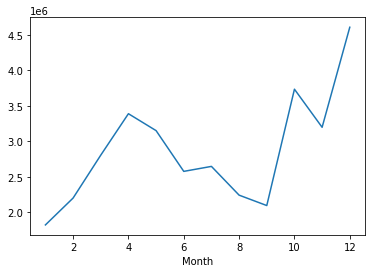

In [47]:
result.plot()
plt.show()

In [41]:
import matplotlib.pyplot as plt

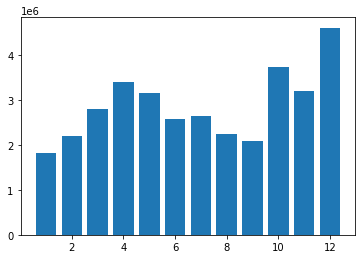

In [46]:
plt.bar(result.index, result)
plt.show()

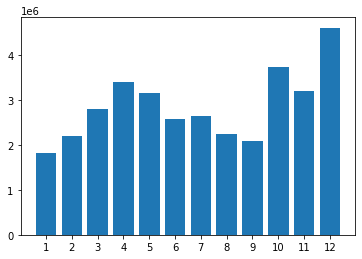

In [48]:
months = range(1,13)
plt.bar(months, result)
plt.xticks(months)
plt.show()

### Question 2: What city had the highest number of sales?

In [93]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [95]:
df["Purchase Address"]

0                    917 1st St, Dallas, TX 75001
1               682 Chestnut St, Boston, MA 02215
2            669 Spruce St, Los Angeles, CA 90001
3            669 Spruce St, Los Angeles, CA 90001
4               333 8th St, Los Angeles, CA 90001
                           ...                   
185682     840 Highland St, Los Angeles, CA 90001
185683    216 Dogwood St, San Francisco, CA 94016
185684       220 12th St, San Francisco, CA 94016
185685     511 Forest St, San Francisco, CA 94016
185686     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185686, dtype: object

In [54]:
df["City"] = df["Purchase Address"].apply(lambda x :x.split(",")[1] + " " + x.split(",")[2].split()[0])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [72]:
df.groupby("City")["Sales"].sum()

City
 Atlanta GA          2.794199e+06
 Austin TX           1.818044e+06
 Boston MA           3.658628e+06
 Dallas TX           2.765374e+06
 Los Angeles CA      5.448304e+06
 New York City NY    4.661867e+06
 Portland ME         4.493214e+05
 Portland OR         1.870011e+06
 San Francisco CA    8.254744e+06
 Seattle WA          2.745046e+06
Name: Sales, dtype: float64

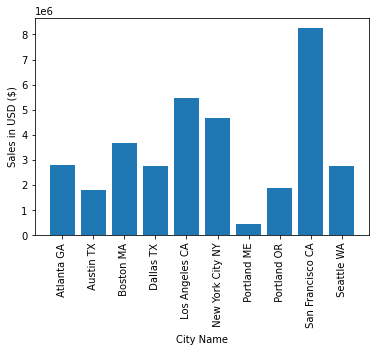

In [74]:
cities = df.groupby("City")["Sales"].sum().index
plt.bar(cities,df.groupby("City")["Sales"].sum())
plt.xticks(cities, rotation = "vertical")
plt.ylabel("Sales in USD ($)")
plt.xlabel("City Name")
plt.show()

### Question 3: What time should we display advertisements to maximize likelyhood of customer's buying product?

In [75]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [81]:
df["Hour"] = df["Order Date"].apply(lambda x: x.hour)

In [85]:
df["Hour"].nunique()

24

In [89]:
hours = df["Hour"].value_counts().sort_index()
hours

0      3902
1      2347
2      1242
3       830
4       852
5      1320
6      2481
7      4002
8      6252
9      8740
10    10929
11    12392
12    12573
13    12115
14    10965
15    10159
16    10359
17    10884
18    12263
19    12886
20    12218
21    10905
22     8808
23     6262
Name: Hour, dtype: int64

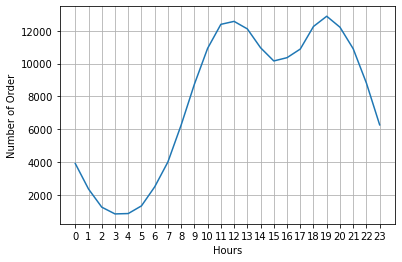

In [96]:
plt.plot(hours.index, hours)
plt.xticks(hours.index)
plt.grid()
plt.ylabel("Number of Order")
plt.xlabel("Hours")
plt.show()

# 10 11 ve 18 19 arası reklam verilebilir.

## herbir şehre göre saat analizi yap.

# what product are most often sold together?

## aynı id ye sahip farklı ürünlerin satılgını gördüm. yani sepette birden fazla ürünü aynı kişi almış

In [109]:
dublicated_order = df[df["Order ID"].duplicated(keep = False)]
dublicated_order

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17
...,...,...,...,...,...,...,...,...,...,...
185630,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20
185641,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0
185642,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0
185678,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13


In [29]:
df[df["Order ID"] == "176560"]

# aynı kişinin tek seferde aldıgı ürünler listesine bakabilirsin
 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [117]:
df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))

0                   USB-C Charging Cable
1             Bose SoundSport Headphones
2         Google Phone, Wired Headphones
3         Google Phone, Wired Headphones
4                       Wired Headphones
                       ...              
185682            AAA Batteries (4-pack)
185683                            iPhone
185684                            iPhone
185685            34in Ultrawide Monitor
185686              USB-C Charging Cable
Name: Product, Length: 185686, dtype: object

In [ ]:
def dublicated():
    df["Order ID"] == dublicated_order

In [101]:
df.iloc[dublicated_order["Order ID"].index]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
31,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17
118,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11
128,176681,ThinkPad Laptop,1,999.99,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",4,999.99,Seattle WA,10
...,...,...,...,...,...,...,...,...,...,...
185603,259278,iPhone,1,700.00,2019-09-11 07:24:00,"505 Hickory St, Atlanta, GA 30301",9,700.00,Atlanta GA,7
185624,259298,20in Monitor,1,109.99,2019-09-18 09:10:00,"188 11th St, Austin, TX 73301",9,109.99,Austin TX,9
185631,259304,Bose SoundSport Headphones,1,99.99,2019-09-02 10:23:00,"309 River St, Boston, MA 02215",9,99.99,Boston MA,10
185643,259315,Lightning Charging Cable,1,14.95,2019-09-29 16:20:00,"112 5th St, Boston, MA 02215",9,14.95,Boston MA,16


aynı id sahip olanları dict key yapalım value olarak da seri oluşturalım 



- True lardan oluşan bir seride value_counts() u istedigimizde truların oranını aynı serinin mean() inini bularak da ulaşabiliriz. 